In [1]:
import pandas as pd
movies = pd.read_csv('fandango_score_comparison.csv')
movies

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.30,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.00,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.50,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.40,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5
5,The Water Diviner (2015),63,62,50,6.8,7.2,4.5,4.0,3.15,3.10,...,3.60,3.0,3.0,2.5,3.5,3.5,34,39373,397,0.5
6,Irrational Man (2015),42,53,53,7.6,6.9,4.0,3.5,2.10,2.65,...,3.45,2.0,2.5,2.5,4.0,3.5,17,2680,252,0.5
7,Top Five (2014),86,64,81,6.8,6.5,4.0,3.5,4.30,3.20,...,3.25,4.5,3.0,4.0,3.5,3.5,124,16876,3223,0.5
8,Shaun the Sheep Movie (2015),99,82,81,8.8,7.4,4.5,4.0,4.95,4.10,...,3.70,5.0,4.0,4.0,4.5,3.5,62,12227,896,0.5
9,Love & Mercy (2015),89,87,80,8.5,7.8,4.5,4.0,4.45,4.35,...,3.90,4.5,4.5,4.0,4.5,4.0,54,5367,864,0.5


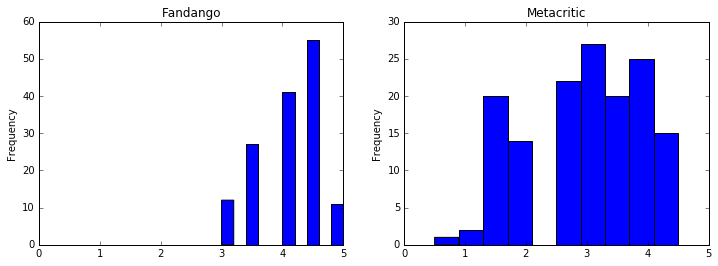

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

f, axx = plt.subplots(1,2, figsize=(12,4))
axx[0].set_xlim(0,5)
axx[1].set_xlim(0,5)
movies['Fandango_Stars'].plot.hist(ax=axx[0], title='Fandango')
movies['Metacritic_norm_round'].plot.hist(ax=axx[1], title='Metacritic')

Fandango's stars ratings are heavily biased toward the top end of the rating range, with no movie receiving less than a 3 star rating. This results in a negatively skewed distribution.

In [3]:
import numpy as np
print('Fand mean: ', movies['Fandango_Stars'].mean())
print('Meta mean: ', movies['Metacritic_norm_round'].mean())
print('Fand median: ', np.median(movies['Fandango_Stars']))
print('Meta median: ', np.median(movies['Metacritic_norm_round']))
print('Fand std: ', np.std(movies['Fandango_Stars']))
print('Meta std: ', np.std(movies['Metacritic_norm_round']))

Fand mean:  4.08904109589
Meta mean:  2.97260273973
Fand median:  4.0
Meta median:  3.0
Fand std:  0.53853216127
Meta std:  0.987561029704


Fandango's central tendency measures robustly exceed those of Metacritic, potentially due to Fandango catering to movie studios, which directly influence Fandango's revenue.

Further, Fandango's standard deviation is much lower than that of Metacritic, due to the restricted range of Fandango's scores between 3-5 stars.

Metacritic's mean is lower than its median, due to a few very low ratings skewing the mean downward. On the contrary, Fandango's mean is higher than its median, due to a few very high scores skewing the mean upward.

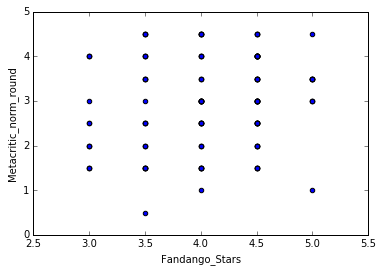

In [11]:
movies.plot.scatter('Fandango_Stars', 'Metacritic_norm_round')

In [14]:
movies['fm_diff'] = np.absolute(movies['Metacritic_norm_round'] - movies['Fandango_Stars'])
movies = movies.sort_values('fm_diff', ascending=False)
movies.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,fm_diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5,4.0
134,The Longest Ride (2015),31,73,33,4.8,7.2,4.5,4.5,1.55,3.65,...,1.5,3.5,1.5,2.5,3.5,49,25214,2603,0.0,3.0
47,Annie (2014),27,61,33,4.8,5.2,4.5,4.2,1.35,3.05,...,1.5,3.0,1.5,2.5,2.5,108,19222,6835,0.3,3.0
19,Pixels (2015),17,54,27,5.3,5.6,4.5,4.1,0.85,2.70,...,1.0,2.5,1.5,2.5,3.0,246,19521,3886,0.4,3.0
85,Little Boy (2015),20,81,30,5.9,7.4,4.5,4.3,1.00,4.05,...,1.0,4.0,1.5,3.0,3.5,38,5927,811,0.2,3.0


In [19]:
import scipy.stats
corr = scipy.stats.pearsonr(movies['Fandango_Stars'], movies['Metacritic_norm_round'])
print(corr)

(0.17844919073895918, 0.031161516228523815)


In [20]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(movies['Metacritic_norm_round'], movies['Fandango_Stars'])
pred_3 = 3 * slope + intercept
pred_3

4.0917071528212041

**Finding Residuals**

3.89708499687
4.28632930877


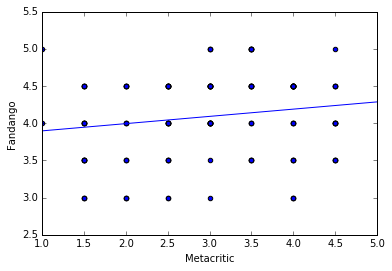

In [24]:
pred_1 = 1 * slope + intercept
print(pred_1)
pred_5 = 5 * slope + intercept
print(pred_5)
plt.scatter(movies['Metacritic_norm_round'], movies['Fandango_Stars'])
plt.plot([1, 5], [pred_1, pred_5])
plt.xlim(1, 5)
plt.xlabel('Metacritic')
plt.ylabel('Fandango')
plt.show()

Fandango's Star ratings and Metacritic's critic ratings are *not** well correlated, likely resulting from the ambiguous rating system used by Fandango.